## Libraries, paths, initializing

In [52]:
import os
import matplotlib.patheffects as path_effects
import matplotlib
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil
matplotlib.rcParams['font.family'] = "Arial"
import time

path = os.getcwd() + '/Init_files/curr.xlsx'
path_pred = os.getcwd() + '/Init_files/prev.xlsx'

path_icon = os.getcwd() + '/Init_files/icons/'

path_potok = os.getcwd() + '/Init_files/potok.xlsx'
path_ruchnik = os.getcwd() + '/Init_files/Ручник.xlsx'
path_vagon = os.getcwd() + '/Init_files/vagon.xlsx'
path_PVS = os.getcwd() + '/Init_files/PVS.xlsm'
path_sun = os.getcwd() + '/Init_files/Солнечный чат.xlsx'
path_variables = os.getcwd() + '/Init_files/Переменные.xlsx'


In [53]:
df_init = pd.read_excel(path, sheet_name = 'Исходник')
df_init = df_init[df_init['Уникальность']==1] #избавляемся от 0
df_pred = pd.read_excel(path_pred, sheet_name = 'Исходник')
df_pred = df_pred[df_pred['Уникальность']==1] #избавляемся от 0
df_init_PASS = pd.read_excel(path_potok, sheet_name = 'Sheet1')
df_init_PASS_depo = pd.read_excel(path_potok, sheet_name = 'Депо')
df_init_PVS = pd.read_excel(path_PVS, sheet_name = 'Лист 1')
df_vagon_init = pd.read_excel(path_vagon)
df_tables_init = pd.read_excel(path_ruchnik, sheet_name = 'Таблицы')

In [54]:
shakht_num = pd.read_excel(path_variables, sheet_name = 'shakht', usecols = [0,1], index_col = 0)

In [55]:
df_escal = pd.read_excel(path_variables, sheet_name = 'escal', usecols = [0,1], index_col = 0)
df_escal = pd.Series(df_escal['column 1'], name = 'escal')

In [56]:
stat_num = pd.read_excel(path_variables, sheet_name = 'stations', usecols = [0,1], index_col = 0)

In [57]:
colors_sluj = pd.Series(['#ef474d','#5fbf5f','#5f9cbf','#7fdfff','#8c6846','#edb776','#7f3f7f','#ffeb7f','#b2cc66','#999999','#82c0c0','#ccccff'],
index = ['СПО','Т','Э','ДИТС','ЭМ','П','Ш','Б','ЭС','ПВС','ОПО','Д'])

In [58]:
colors_order = pd.Series(['#ffeb7f','#edb776','#8c6846','#ef474d','#ccccff','#7f3f7f','#5f9cbf','#7fdfff','#999999','#82c0c0','#5fbf5f','#b2cc66'],
                         index = ['Б','П','ЭМ','СПО','Д','Ш','Э','ДИТС','ПВС','ОПО','Т','ЭС'])

In [59]:
colors_l = pd.DataFrame(['#EF161F','#2DBE2C','#0078BE','#00BFFF','#8D5B2D','#ED9121','#800080','#FFD702','#999999','#99CC00','#82C0C0','#A1B3D4','#FFD702','#DE64A1'],
                         index = ['СЛ','ЗЛ','АПЛ','ФЛ','КЛ','КРЛ','ТКЛ','КлнЛ','СТЛ','ЛДЛ','БКЛ','БЛ','СлнЛ', 'НЛ'], 
                         columns=['colors'])

In [60]:
try:
    shutil.rmtree(os.getcwd()+'/Results')
except:
    None

try:
    os.mkdir(os.getcwd()+'/Results')
except:
    None

## Plotting functions

### First example

In [80]:
def plot_pie_2(df_plot, ser, otm, index_col = None, cons1_rad = None, cons2_rad=None, text_const = None):
    import matplotlib
    matplotlib.rcParams['font.family'] = "Arial"
    from matplotlib.font_manager import FontProperties
    font0 = FontProperties()
    
    #properties
    plt.figure(figsize=(5,5), dpi = 300)
    
    df_len = len(df_plot.vis)
    #cons1_rad = 0.3
    #cons2_rad = 0.9
    cons1_rad = cons1_rad
    cons2_rad = cons2_rad
    
    alpha = 1
    
    font = font0.copy()
    font.set_weight('bold')

    for i, y in enumerate(df_plot.index):
        radius = (np.arange(0,df_len,cons2_rad)+cons1_rad)[::-1][i]
        
        n = plt.pie(df_plot.iloc[i, [0,1]], 
                startangle=270, 
                frame=False, 
                #radius = 10,
                radius = radius, 
                colors = [colors[name]]+['#F0F0F0'],
                counterclock = False, 
                wedgeprops=dict(width=cons2_rad, edgecolor='w')
               )
        #plt.title(x)
        
        n[0][0].set_alpha(alpha)
        alpha = alpha-0.2
        
        text_1 = ser[::-1]
        text_2 = df_plot.index[::-1]
        #print(text_1, text_2)
        
        #ploting text to chart
        plt.text(1, (radius + (np.arange(0,df_len,cons2_rad)+cons1_rad)[::-1][i+1])/2 - text_const, 
                 s = '{:.0f}%:'.format((text_1[i])), 
                 horizontalalignment = 'right',
                 verticalalignment = 'center',
                 fontproperties = font, 
                 bbox=dict(facecolor='w', alpha = 0, edgecolor = 'none'), 
                 size=13, path_effects = [path_effects.Stroke(linewidth=0.9, foreground='w'), path_effects.Normal()])

        plt.text(1.1, (radius + (np.arange(0,df_len,cons2_rad)+cons1_rad)[::-1][i+1])/2 - text_const, 
                 s = '{}'.format(text_2[i]), 
                 horizontalalignment = 'left',
                 verticalalignment = 'center',
                 fontproperties = font, 
                 bbox=dict(facecolor='w', alpha = 0, edgecolor = 'none'), 
                 size=13)        

#ploting text of service
    plt.text(1.5, -1.1, 
                 s = '{} || {} || {}'.format(name, df_plot.iloc[0,2], otm), 
                 horizontalalignment = 'left',
                 verticalalignment = 'center',
                 fontproperties = font, 
                 color = colors[name], 
                 size=18, alpha = 1, bbox=dict(facecolor='none', alpha = 1, edgecolor = colors[name], boxstyle = 'round'))

    plt.ylim(-df_len-cons1_rad,df_len+cons1_rad)
    plt.xlim(-df_len-cons1_rad,df_len+cons1_rad)
    #plt.yticks(np.arange(0,df_len,cons2_rad)+cons1_rad)

    #Draw circle
    centre_circle = plt.Circle((0,0), radius-0.8,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    #plt.grid(True)
    
    
    import matplotlib.image as mpimg
    from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
    im = mpimg.imread('{}{}.png'.format(path_icon, name))

    imagebox = OffsetImage(im, zoom=0.4)
    ab = AnnotationBbox(imagebox, (0, 0), frameon=False)
    ax = plt.gca()
    ax.add_artist(ab)
    
    fig.savefig('{}/Results/SlaidPVS_{}.png'.format(os.getcwd(), name), transparent = True, dpi = 220, quality = 1)

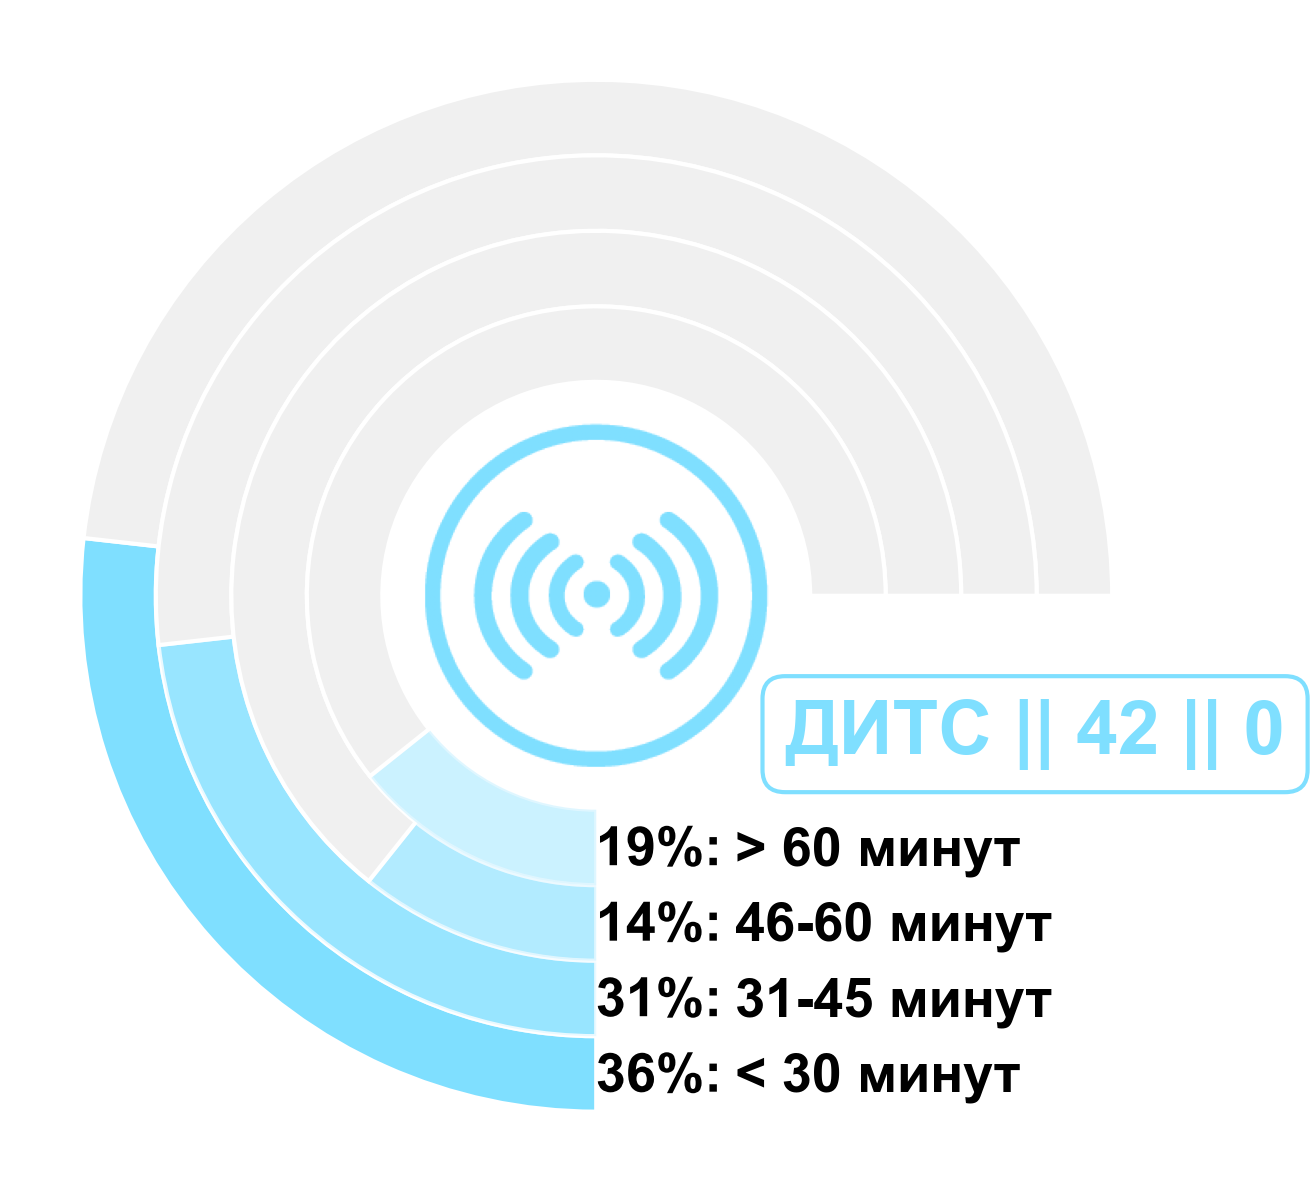

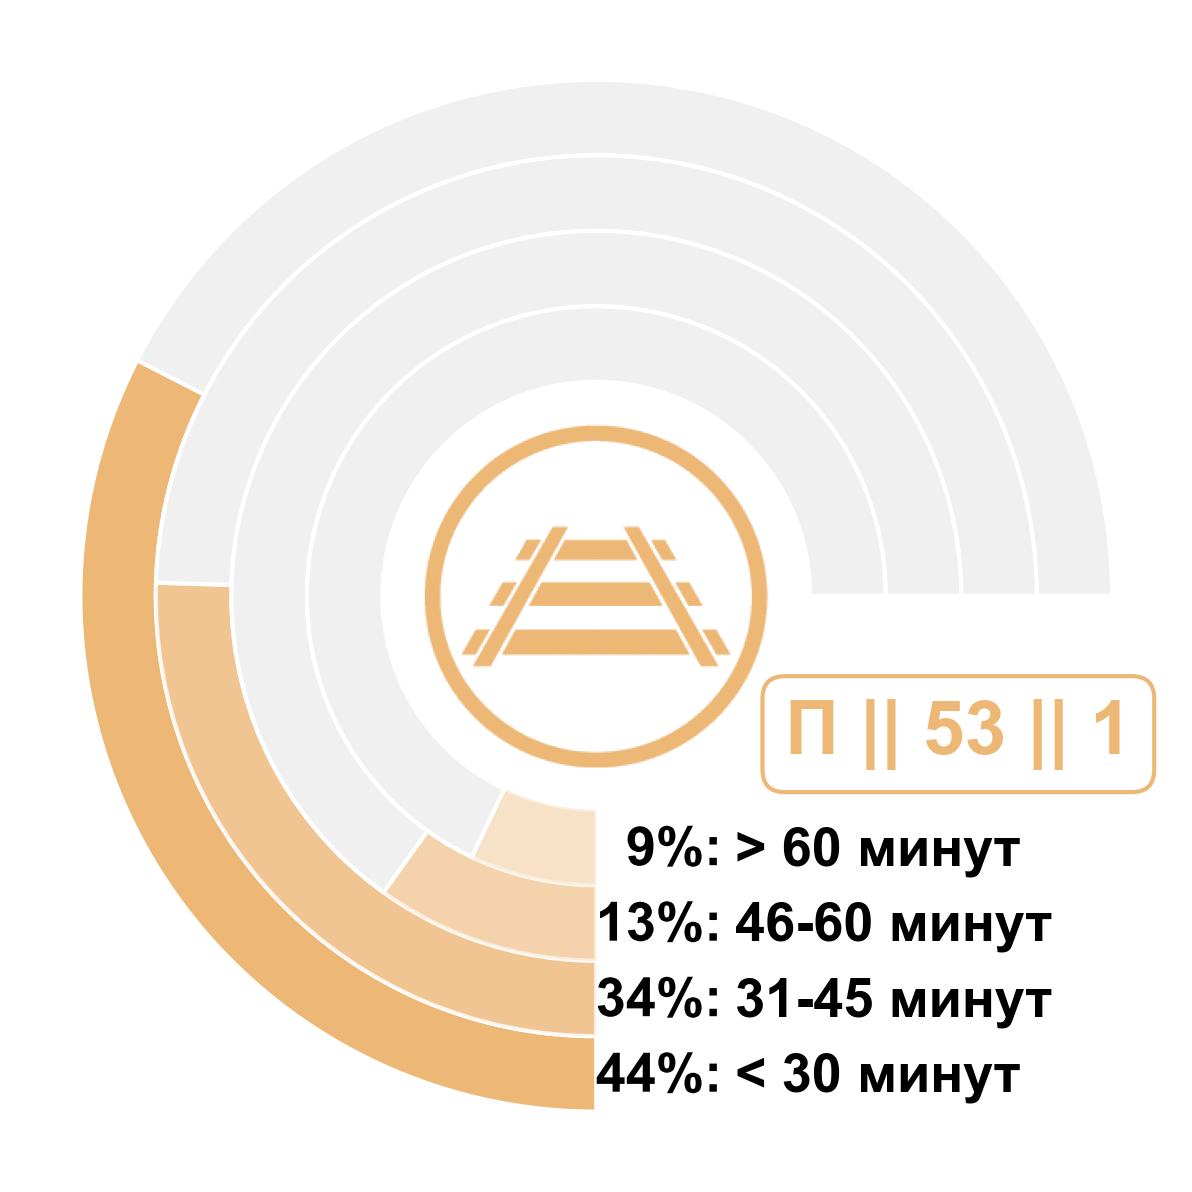

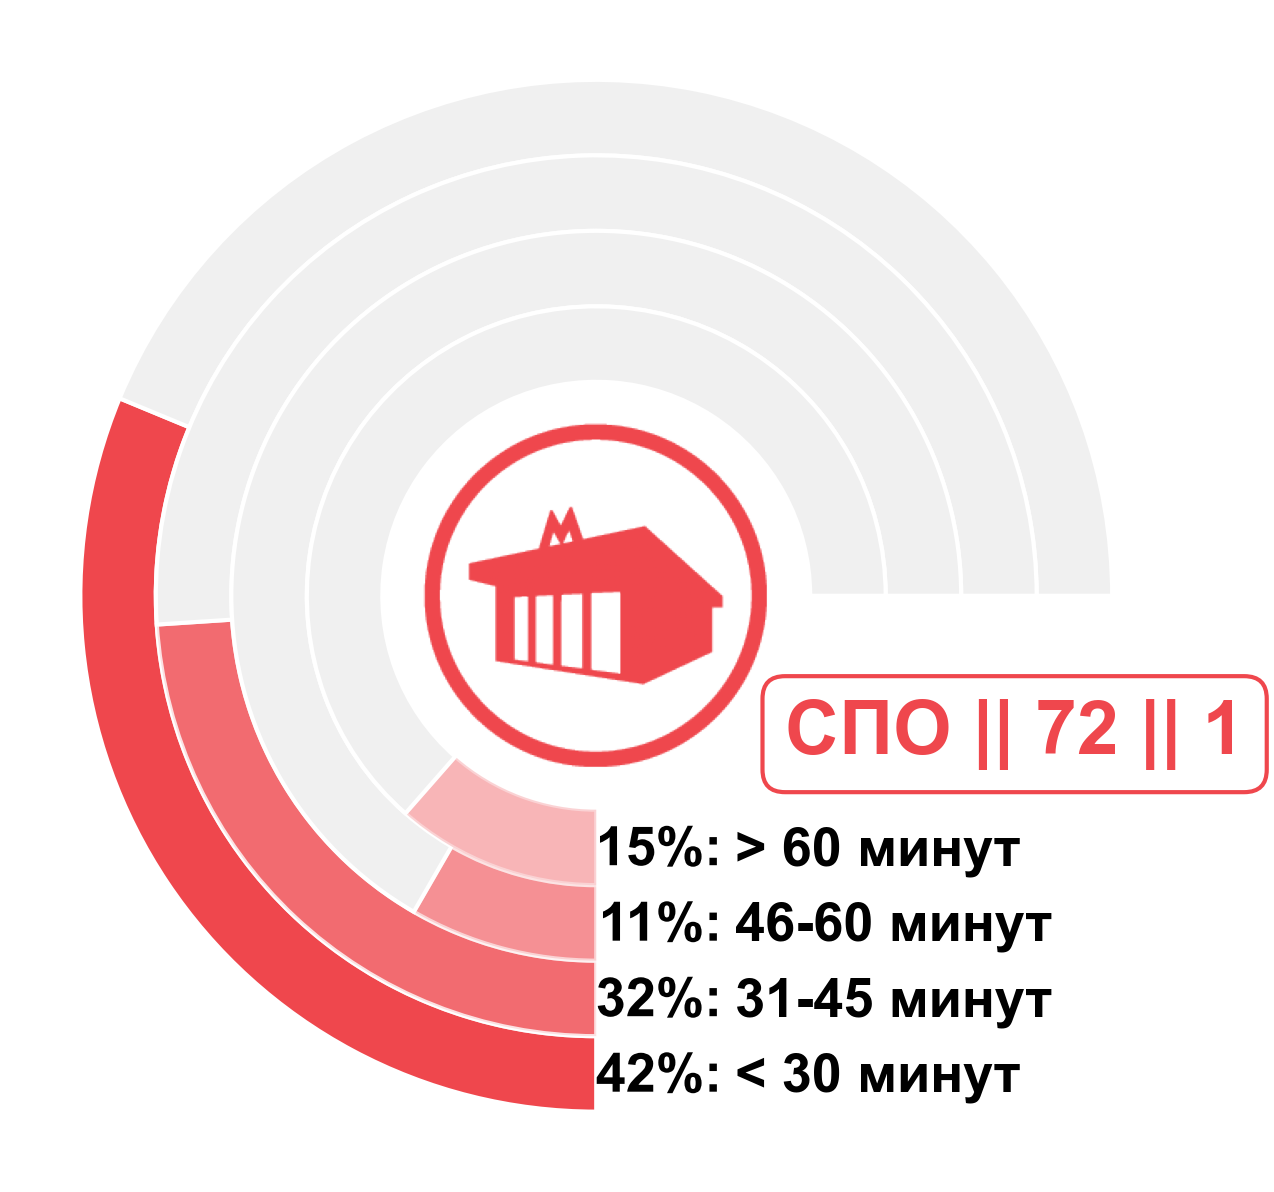

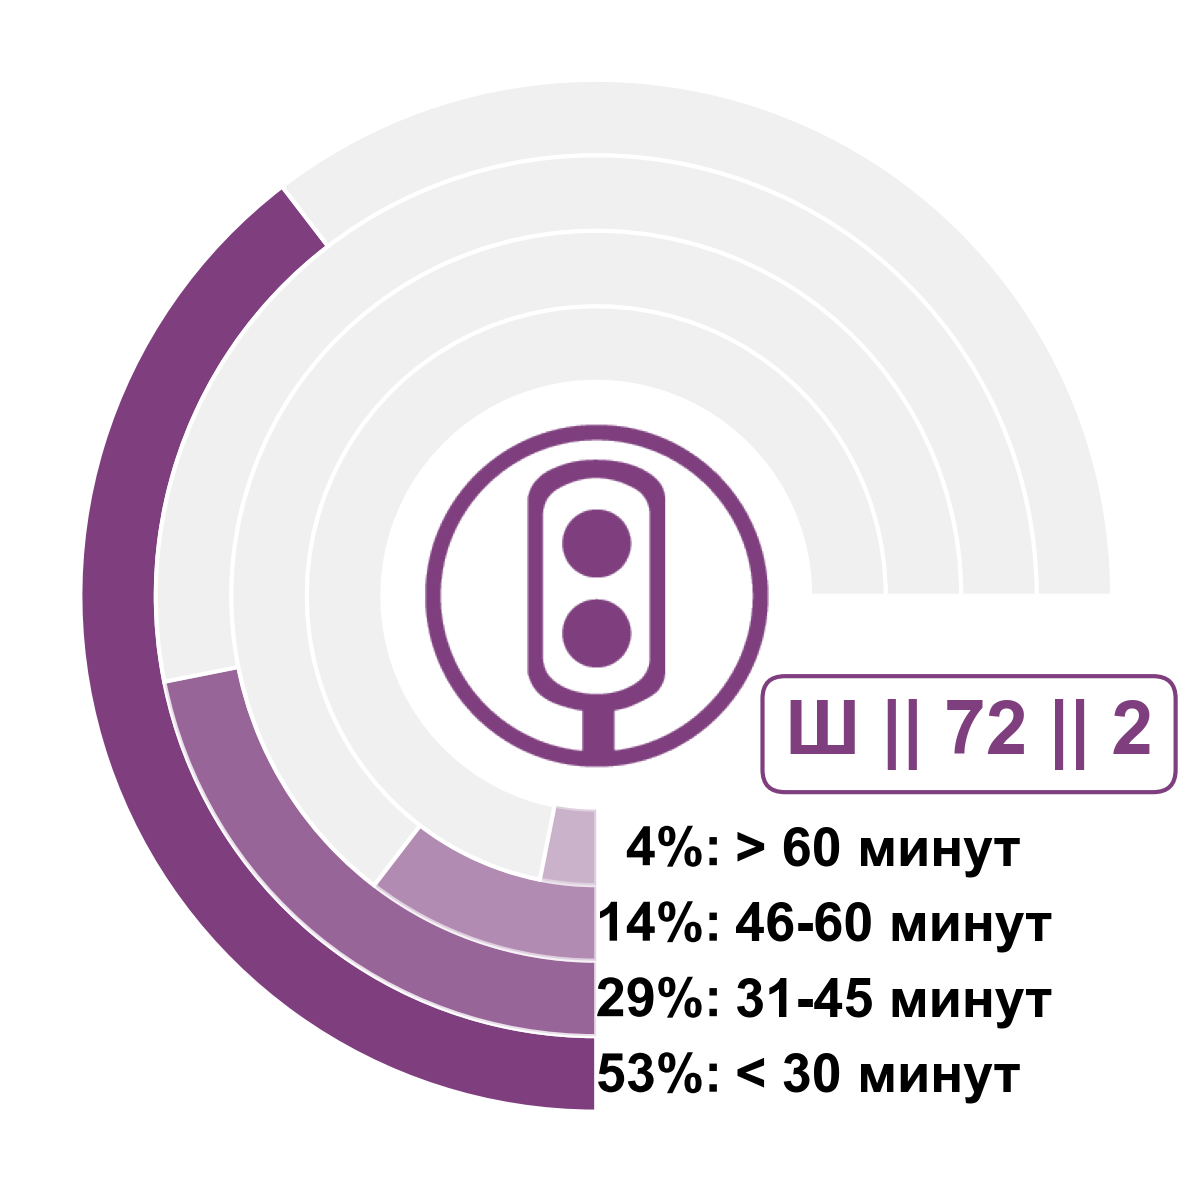

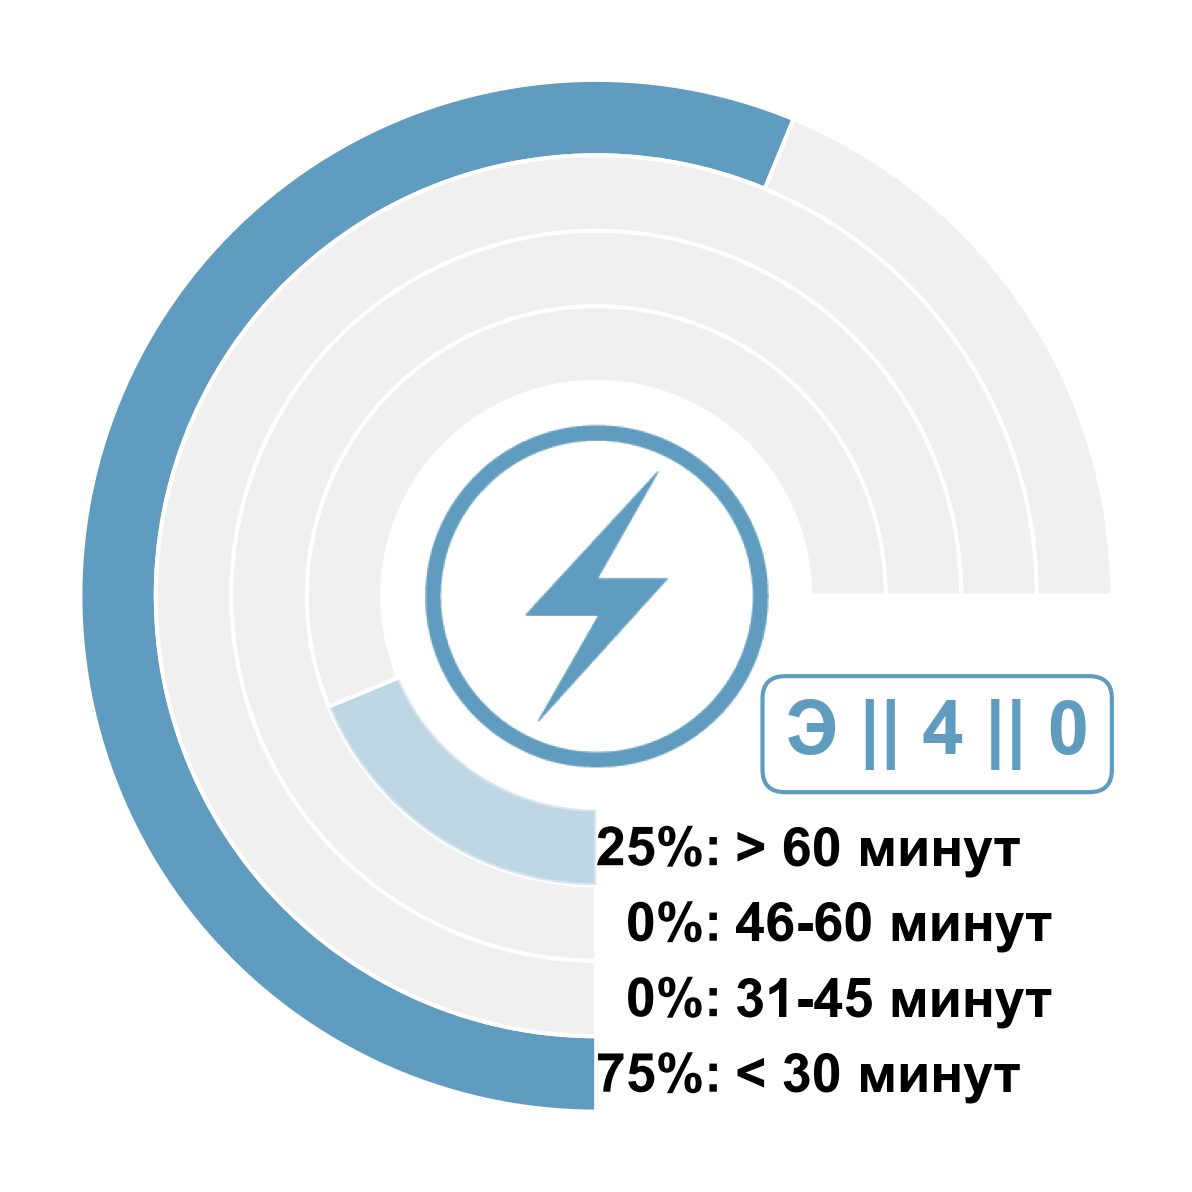

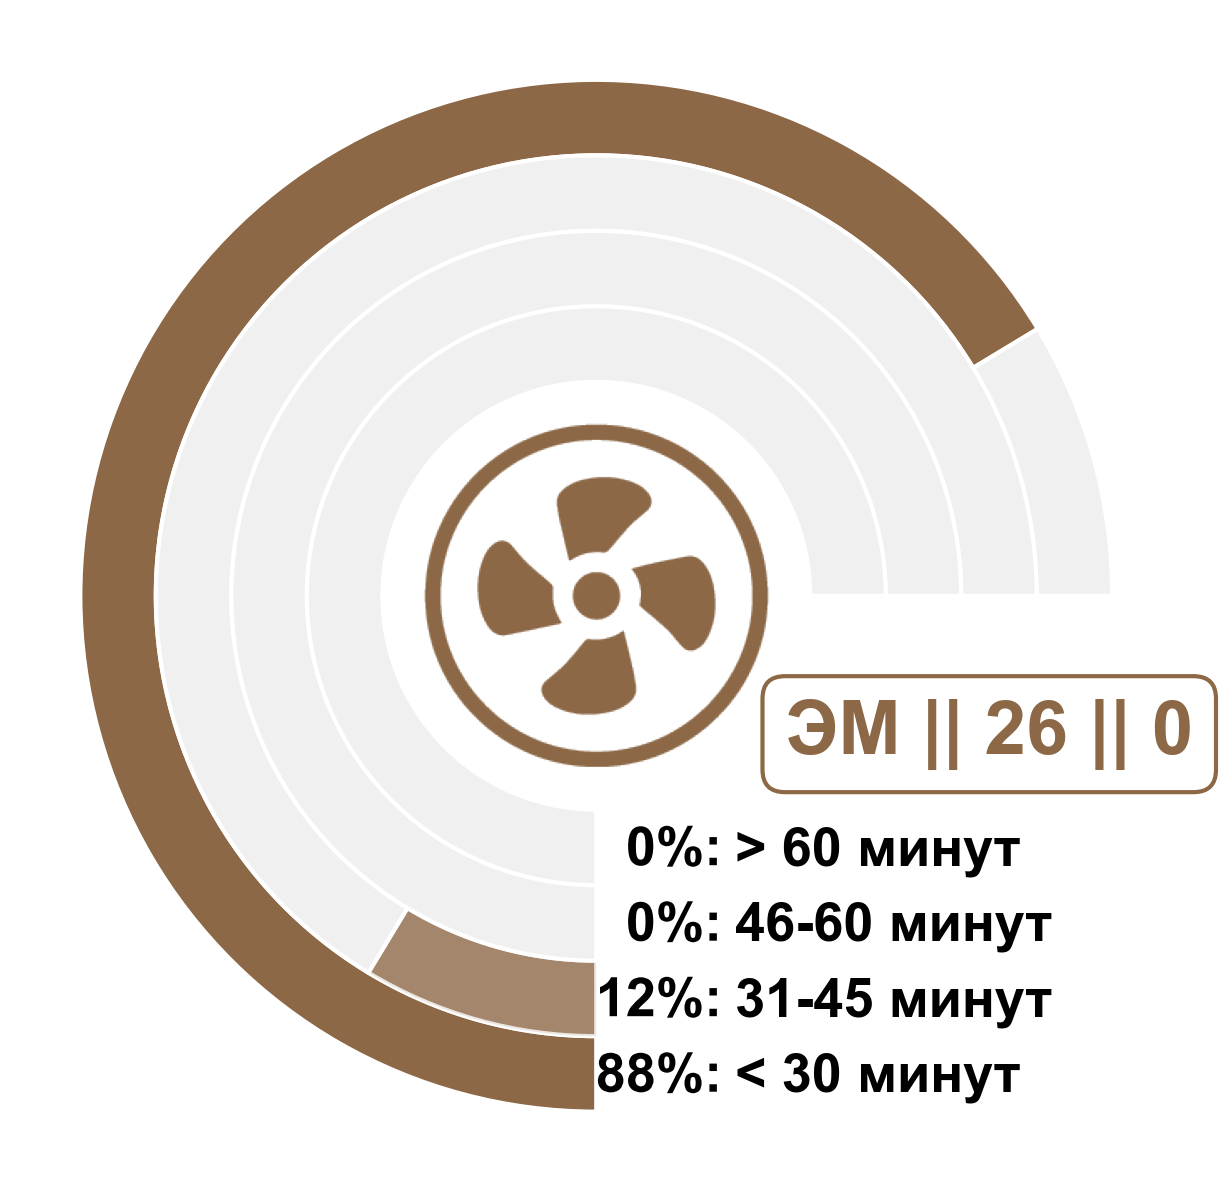

In [84]:
for y, z in enumerate(df.index):
    df_plot = pd.DataFrame()
    name = df.iloc[y,].name
    df_plot['vis'], df_plot['non_vis'], df_plot['non_vis_w'] = df.iloc[y,]*0.75, (1-df.iloc[y,])*0.75, sums[y]
    
    ser = divmod((df_plot.iloc[:,0]/df_plot.iloc[:,0].sum()*100).round(0),1)[0] #значения для процентов   
    
    try:
        otm = df_otm.loc[z, 'Отмена']
    except:
        otm = 0
    
    #проверка на полноту !=100
    if ser.sum()!=100:
        diff = 100 - ser.sum()
        ser[0] = ser[0]+diff
        ser = ser[df_plot.index]
    
    plot_pie_2(df_plot, ser, otm, cons1_rad = 0.5, cons2_rad = 0.6, text_const = 5.83)

### Second example

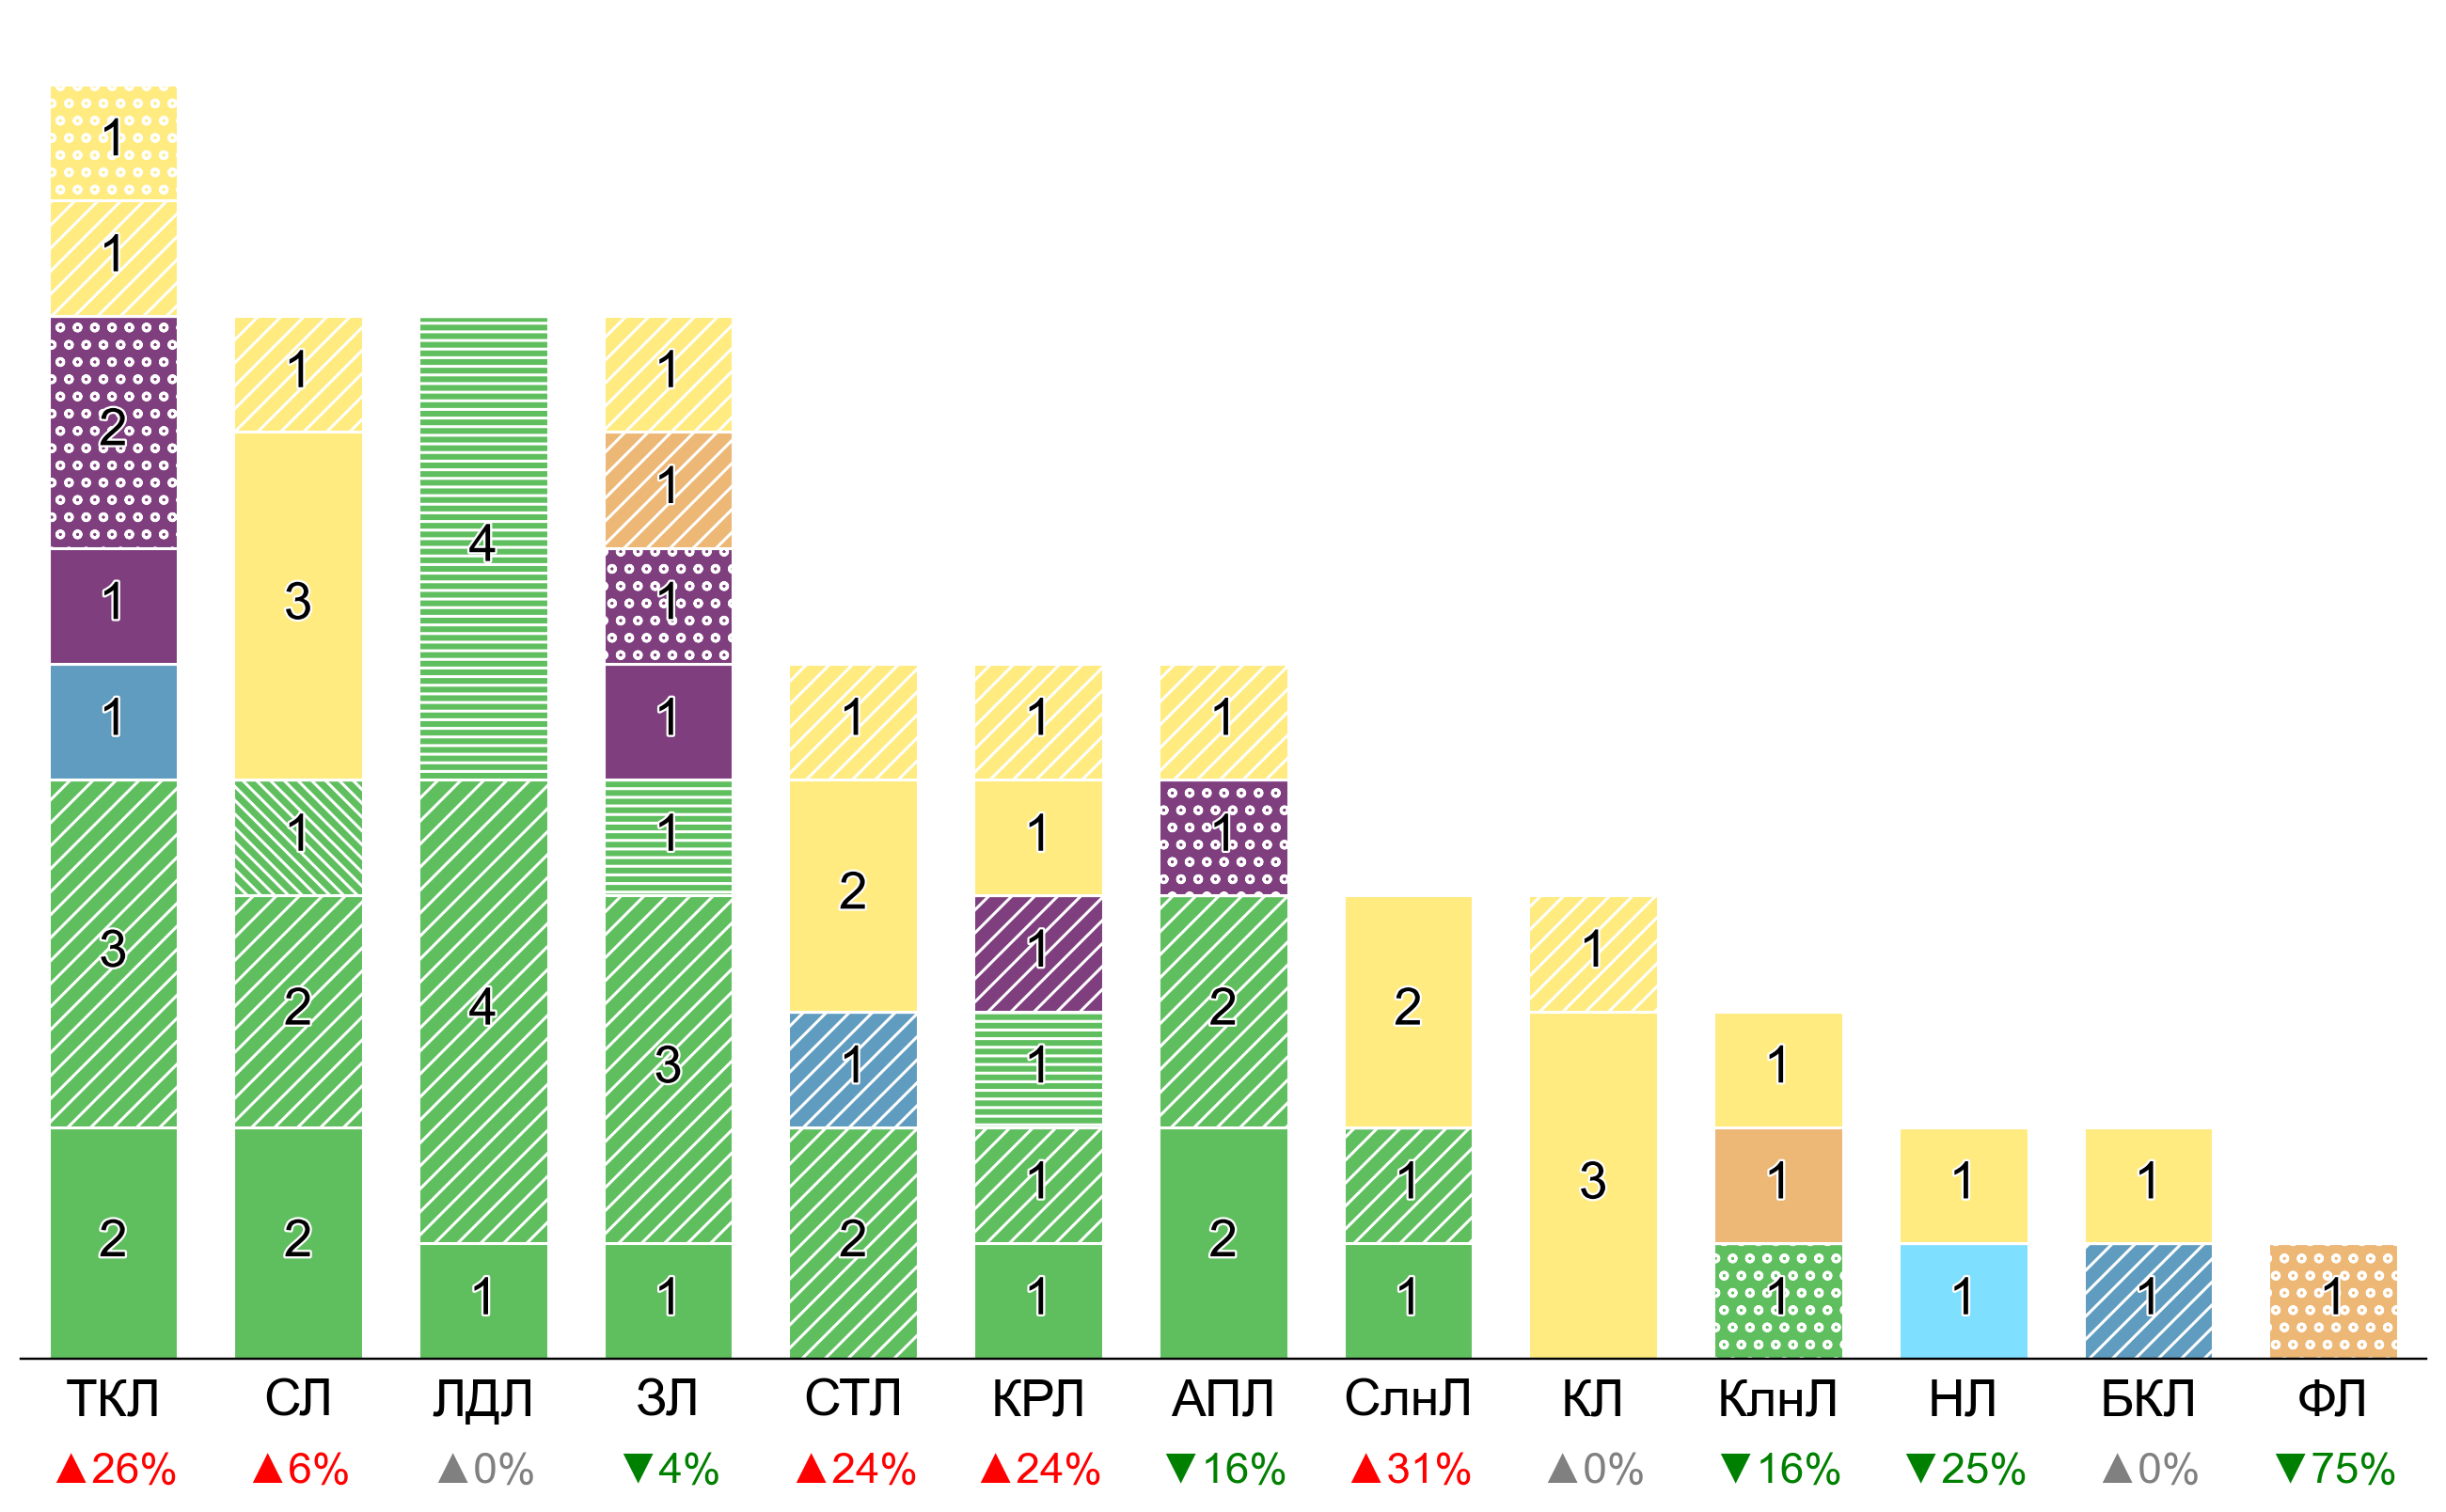

In [96]:
import matplotlib.patheffects as path_effects
import matplotlib
matplotlib.rcParams['font.family'] = "Arial"
matplotlib.rcParams['hatch.linewidth'] = 1

fig, ax = plt.subplots(figsize=(15,8.57), dpi=220)

height = 0

text_size = 18
diff_size = 15
diff_position = -0.07

bottom = [0]*len(group.index)

for o in order:
    check = df_proc.loc[df_proc['Ответственная служба']==o, ].drop(['Ответственная служба','sum'], axis = 1).sum().sum()
    if check ==0:
        None
    else:
        df_plot = df_proc.loc[df_proc['Ответственная служба']==o, ].drop(['Ответственная служба','sum'], axis = 1)
        df_plot = df_plot.loc[:,df_plot.sum(axis=0)>0]
        df_plot = pd.merge(group, df_plot, right_index = True, how = 'left', left_index = True).drop('sum', axis=1).fillna(0)

        for n, i in enumerate(df_plot.columns):
            
            if n==0:
                hatch_v = ''
            else:
                hatch_v = hatch.iloc[n][0]
            
            a = ax.bar(x = df_plot.index, height = df_plot.iloc[:,n], 
                       color = colors[o], 
                       bottom = bottom, width = 0.7, lw=1, ec='w', 
                       hatch=hatch_v)

            for y, m, v in zip(a, bottom, df_plot.loc[:,i]):
                
                if y.get_height()!=0:
                    
                    ax.text(x = (y.get_x() + y.get_x()+y.get_width())/2, 
                            y = (m+v+m)/2, 
                            s = '{:.0f}'.format(v), ha='center', zorder = 11, va='center', size = text_size, rotation=0,
                            path_effects = [path_effects.Stroke(linewidth=1.5, foreground='w'), path_effects.Normal()])
                else:
                    None


            bottom += df_plot.iloc[:,n]

            

ax1 = ax.twinx()

for i, x in enumerate(legend):
    if (x == "*")|(x == np.inf):
        ax1.text(i, diff_position, s = '*', c = 'grey', ha='center', va = 'top', size = diff_size)
    elif x > 0:
        ax1.text(i, diff_position, s = '▲{:.0%}'.format(x), c = 'r', ha='center', va = 'top', size = diff_size)
    elif x == 0:
        ax1.text(i, diff_position, s = '▲{:.0%}'.format(x), c = 'grey', ha='center', va = 'top', size = diff_size)
    else:
        ax1.text(i, diff_position, s = '▼{:.0%}'.format(x*-1), c = 'g', ha='center', va = 'top', size = diff_size)            
            
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax1.axis('off')

ax.set_yticks([])
ax.set_xlim(-0.5,len(df_plot.index)-0.5)

ax.tick_params(axis = 'x', bottom=False, labelbottom=True, labelsize = text_size)

fig.savefig('{}/Results/Slaid11_Narush_povl_uch_otmeny_1.png'.format(os.getcwd()), transparent = True, dpi = 220, quality = 1, bbox_inches = 'tight')

plt.show()

#▲▼

In [97]:
lam = 800

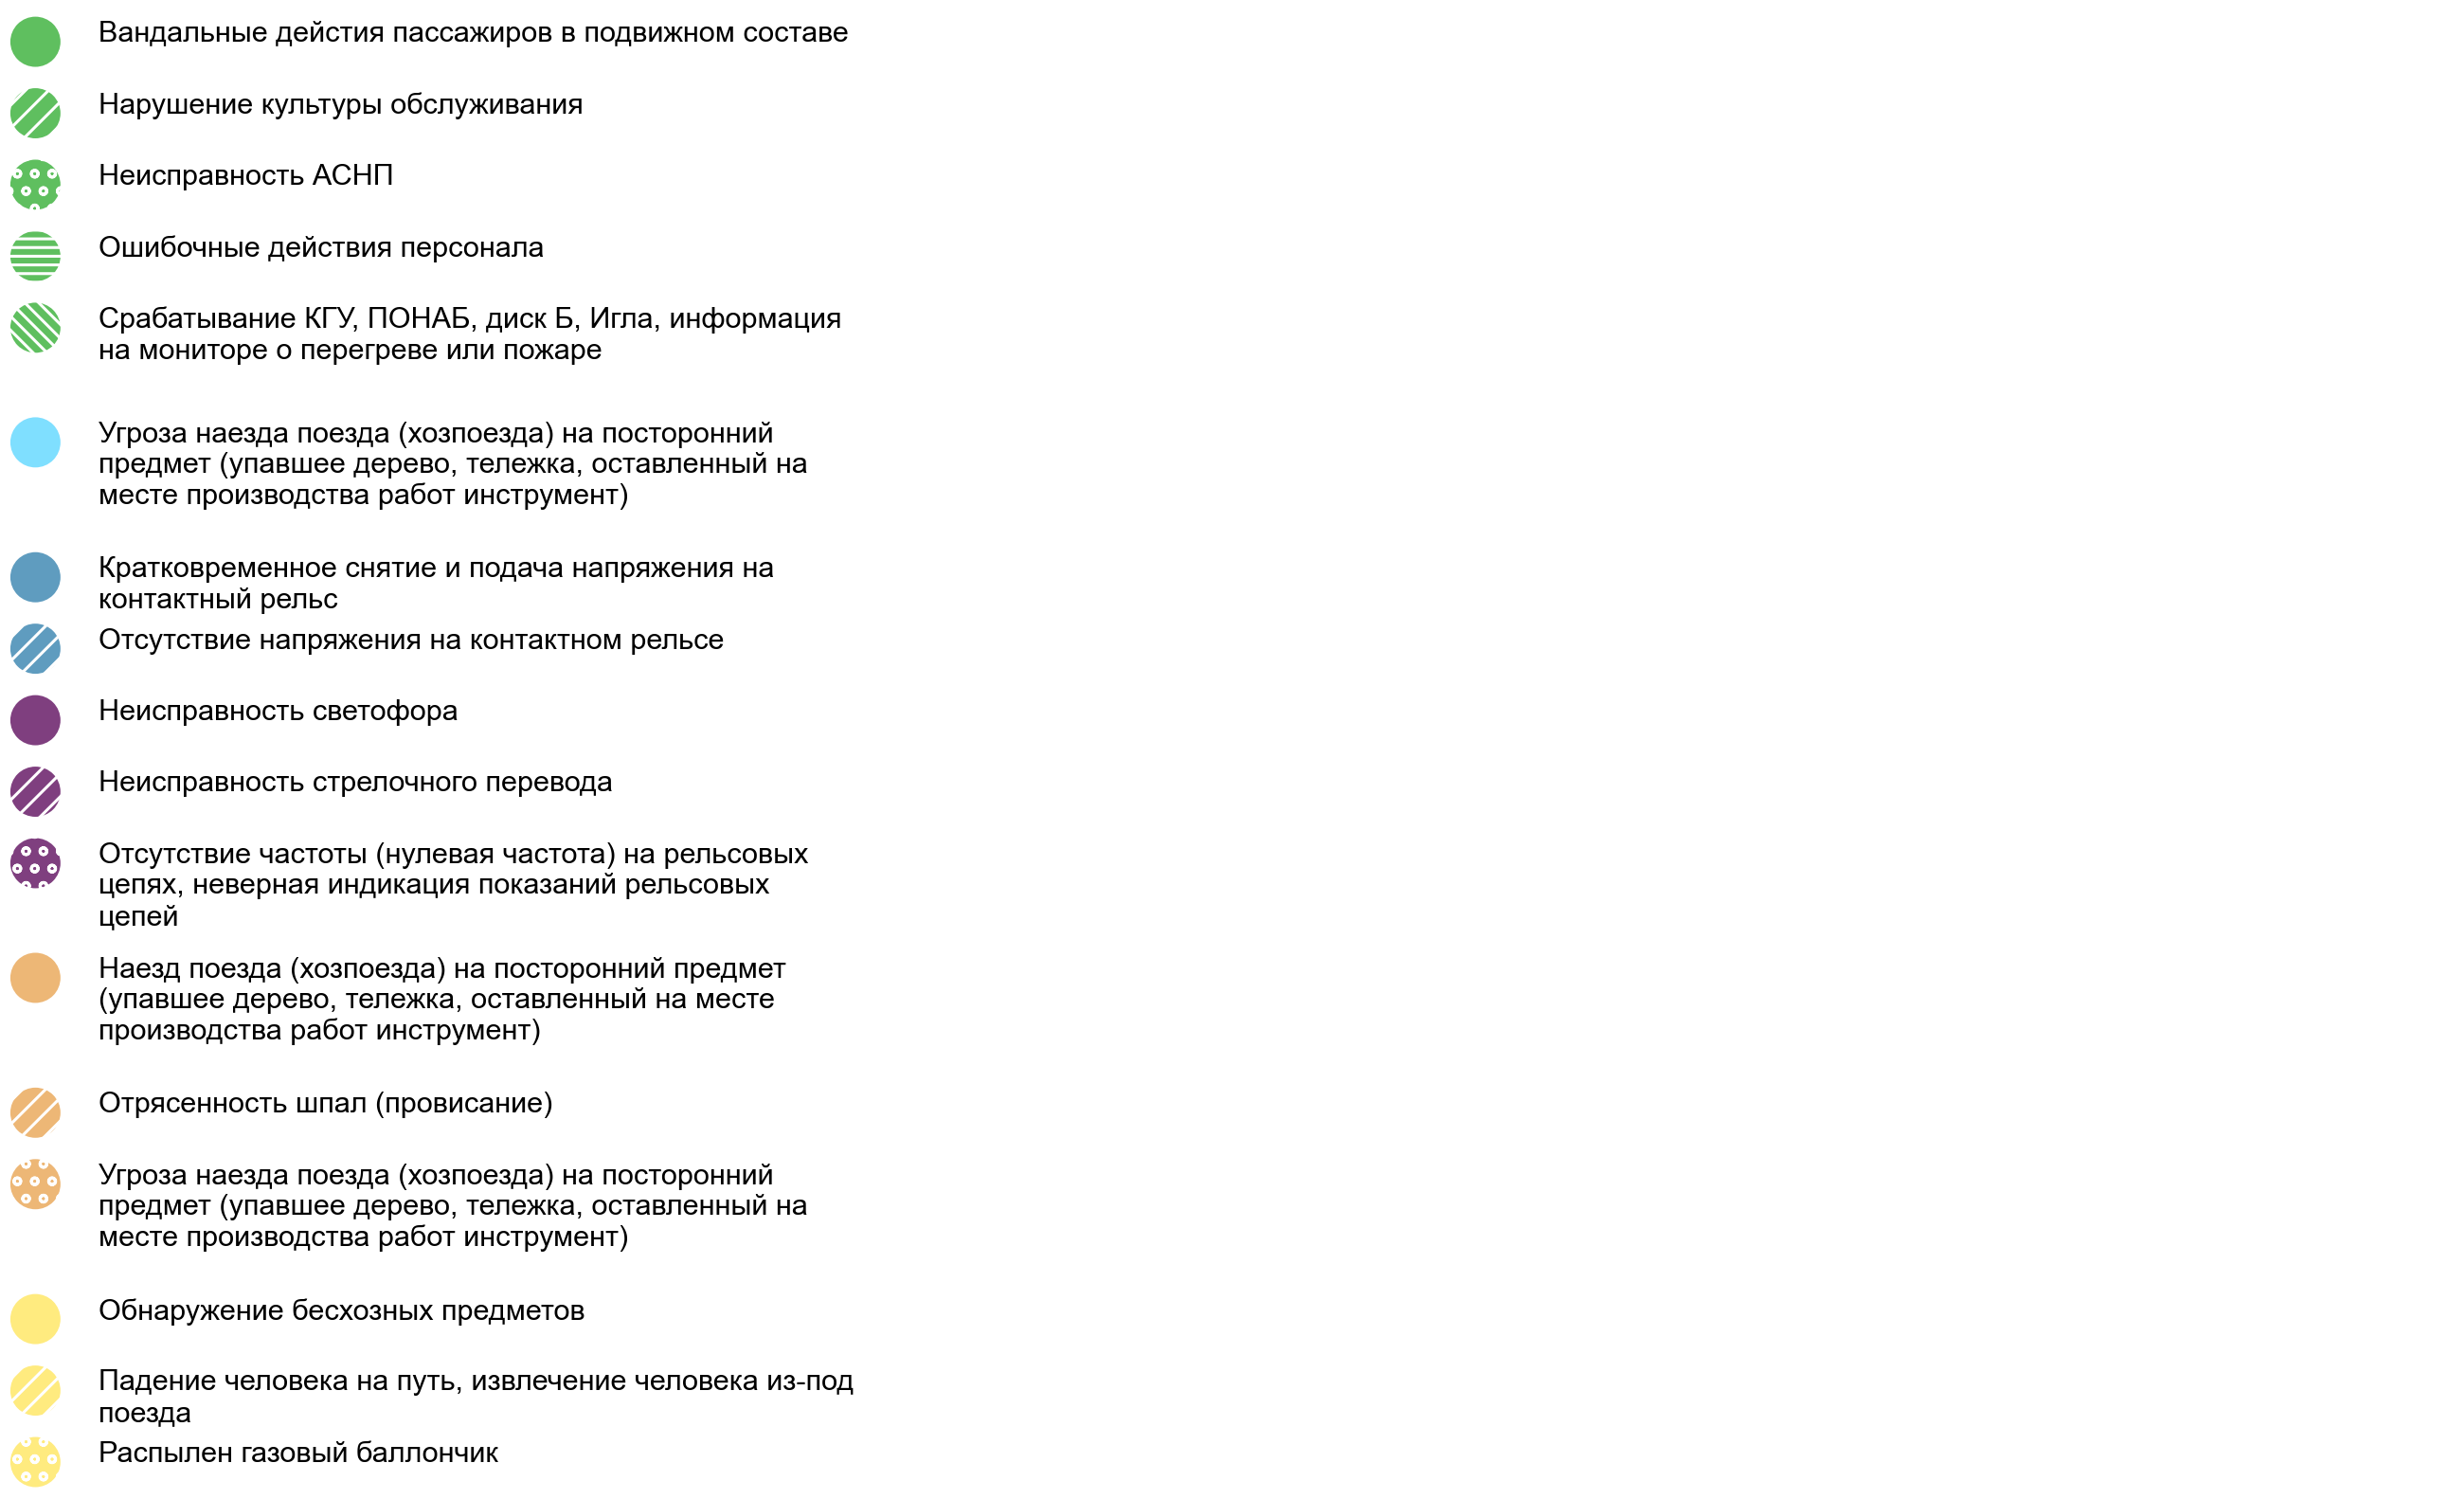

In [98]:
import matplotlib.patheffects as path_effects
import matplotlib
matplotlib.rcParams['font.family'] = "Arial"
matplotlib.rcParams['hatch.linewidth'] = 1
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(15,8.57), dpi=220)

step_1 = 0.053
step_2 = 0.07
step_3 = 0.085
step_4 = 0.1

b1 = 65
b2 = 75
b3 = 120

cntr = np.arange(0,len(df_plot.index),2)

bbox_size = 12

distance = 0.032

height = 1

for o in order:
    check = df_proc.loc[df_proc['Ответственная служба']==o, ].drop(['Ответственная служба','sum'], axis = 1).sum().sum()
    if check ==0:
        None
    else:
        df_plot = df_proc.loc[df_proc['Ответственная служба']==o, ].drop(['Ответственная служба','sum'], axis = 1)
        df_plot = df_plot.loc[:,df_plot.sum(axis=0)>0]
        df_plot = pd.merge(group, df_plot, right_index = True, how = 'left', left_index = True).drop('sum', axis=1).fillna(0)

        for n, text in enumerate(df_plot.columns):
            
            if n==0:
                hatch_v = ''
            else:
                hatch_v = hatch.iloc[n][0]
                
            #BOXES
            if n==0:
                hatch_v = ''
            else:
                hatch_v = hatch.iloc[n][0]  

            ax.text(0, height-0.004, '...', c='w', alpha = 0, ha='left', va='top', 
                    bbox=dict(boxstyle='circle', fc=colors[o], ec='w', hatch = hatch_v), 
                    size = bbox_size)
            #--BOXES

            #TEXT
            if n == len(text)-1:
                n = 0
            if len(text) < b1:
                step = step_1
            elif len(text) < b2:
                step = step_2
            elif len(text) < b3: 
                step = step_3
            else:
                step=step_4
#             print(step, len(text), text[:10])
            txt = ax.text(distance, height, text, ha='left', va='top', wrap = True, size = 10)
            txt._get_wrap_line_width = lambda : lam
            #--TEXT

            height -= step

ax.axis('off')

ax.set_yticks([])
ax.set_xticks([])

#ax.set_ylim(top=0.1)

fig.savefig('{}/Results/Slaid11_Narush_povl_uch_otmeny_2.png'.format(os.getcwd()), transparent = True, dpi = 220, quality = 1, bbox_inches = 'tight')

plt.show()